In [3]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
% matpllotlib inline

UsageError: Line magic function `%` not found.


In [6]:
df= pd.read_csv('US_graduate_schools_admission_parameters_dataset.csv') # reading the CSV file

In [7]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [11]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
# to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occurring scores so that data follows the general trend
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
# to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occurring scores so that data follows the general trend

In [12]:
df['TOEFL Score'].mode()[0]

110

In [14]:
df['GRE Score'].mode()

0    312
1    324
dtype: int64

In [16]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
# to replace the missing values in the 'University Rating' column with the mode of the column
# Mean 

In [24]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
print(df['Chance of Admit '])

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


In [37]:
df.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [40]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction
x=df.drop(['Chance of Admit ','Serial No.'],axis=1)
# 'Chance of Admit' is the target column which shows the probability of admission for a candidat
y=df['Chance of Admit ']


In [41]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


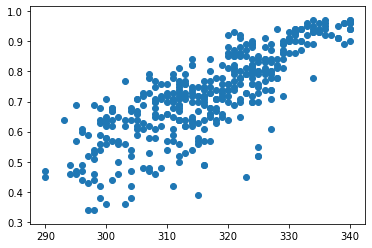

In [42]:
plt.scatter(df['GRE Score'],y) # Relationship between GRE Score and Chance of Admission
plt.show()

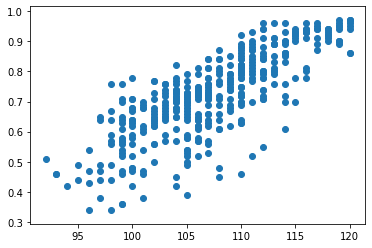

In [43]:
plt.scatter(df['TOEFL Score'],y) # Relationship between TOEFL Score and Chance of Admission
plt.show()

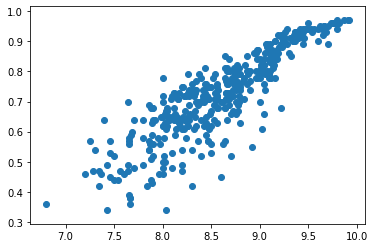

In [44]:
plt.scatter(df['CGPA'],y) # Relationship between CGPA and Chance of Admission
plt.show()

#From the above graphs between the continuous feature variables and the label column,
it can be concluded that they exhibit a linear relationship amongst them. So, we’ll use
Linear regression for prediction.
• Once we have determined the Machine Learning algorithm to use, we’ll split the
datasets into train and test sets as shown below:

In [46]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,
random_state=100)

In [47]:
train_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
353,300,102,3,3.5,2.5,8.17,0
132,309,105,5,3.5,3.5,8.56,0
26,322,109,5,4.5,3.5,8.80,0
199,313,107,3,4.0,4.5,8.69,0
35,320,110,5,5.0,5.0,9.20,1
...,...,...,...,...,...,...,...
343,305,103,2,2.5,3.5,8.13,0
359,321,107,2,2.0,1.5,8.44,0
323,305,102,2,2.0,2.5,8.18,0
280,311,102,3,4.5,4.0,8.64,1


In [48]:
test_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
248,324,110,3,3.5,4.0,8.87,1
318,324,111,3,2.5,2.0,8.80,1
173,323,113,4,4.0,4.5,9.23,1
285,331,116,5,4.0,4.0,9.26,1
184,316,106,2,2.5,4.0,8.32,0
...,...,...,...,...,...,...,...
120,335,117,5,5.0,5.0,9.56,1
59,311,104,2,2.0,2.0,8.30,0
88,314,108,3,4.5,3.5,8.14,0
249,321,111,3,3.5,4.0,8.83,1


In [49]:
train_y

353    0.63
132    0.71
26     0.76
199    0.72
35     0.88
       ... 
343    0.59
359    0.81
323    0.62
280    0.68
8      0.50
Name: Chance of Admit , Length: 268, dtype: float64

In [50]:
# fitting the date to the Linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# calculating the accuracy of the model
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)

In [52]:
score

0.7727846883591631

In [53]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [54]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

0.9974119182218157


In [56]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [57]:
print(prediction)

[0.99741192]
